In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.stats import nbinom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pareto

In [3]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['font.size'] = 17

負の二項分布からのランダムサンプルをテストデータとする

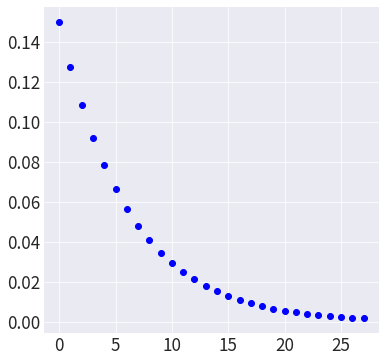

In [4]:
n, p = 1, 0.15
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p))
y = nbinom.pmf(x, n, p)

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'bo')
plt.show()

In [5]:
df= pd.DataFrame({
    '成功回数' : nbinom.rvs(n, p, size=100000)
})

In [6]:
dfagg = df.groupby(['成功回数'], as_index=False).size()
dfagg.head(10)

,成功回数,size
0,0,14945
1,1,12814
2,2,10888
3,3,9142
4,4,7940
5,5,6587
6,6,5648
7,7,4720
8,8,4044
9,9,3496


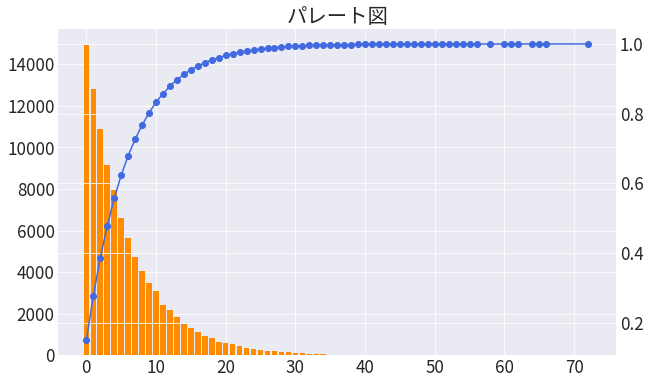

In [7]:
pareto.plot(dfagg, '成功回数', 'size', 'パレート図')